# 3 평가

성능 평가 지표(Evaluation Metric)은 일반적으로 모델이 분류나 회귀냐에 따라서 여러 종류로 나뉨
본 장에서는 분류에 사용되는 성능 평가 지표에 대해서 알아볼 것 

특히, 0과 1로 결정값이 한정되는 이진 분류의 성능 평가 지표에 관한 내용


*분류의 성능 평가 지표 

- 정확도

- 오차행렬

- 정밀도

- 재현율

- F1스코어

- ROC AUC


1 정확도 

: 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표

정확도=예측 결과가 동일한 데이터 건수/전체 예측 데이터 건수 


* 정확도 사용 시 주의해야할 점


불균형한 레이블 값 분포에서 ML모델의 성능을 판단할 경우 적합한 평가 지표가 아님 


<MNIST 데이터셋을 multi classification에서 binary classification으로 변경


ex) 7의 경우, 7이 아닌 다른 모든 숫자를 False, 7만 True로 결과값 만듬 =불균형한 레이블 값 



In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score 
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    #입력값으로 들어오는 x 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

#사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩

digits=load_digits()

#digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y=(digits.target==7).astype(int)
X_train, X_test, y_train, y_test=train_test_split(digits.data, y, random_state=11)
#불균형한 레이블 데이터 분포도 확인 
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier로 학습 예측 정확도 평가 
fakeclf=MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


-->
단순한 predict()의 결과를 np.zeros()로 모두 0값으로 반환함에도 불구하고 450개의 테스트 데이터의 예측 정확도는 90%

말도 안되는 결과값임 

이를 극복하기 위해서 여러가지 다른 분류 지표들이 나왔음


02 오차행렬

:학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표

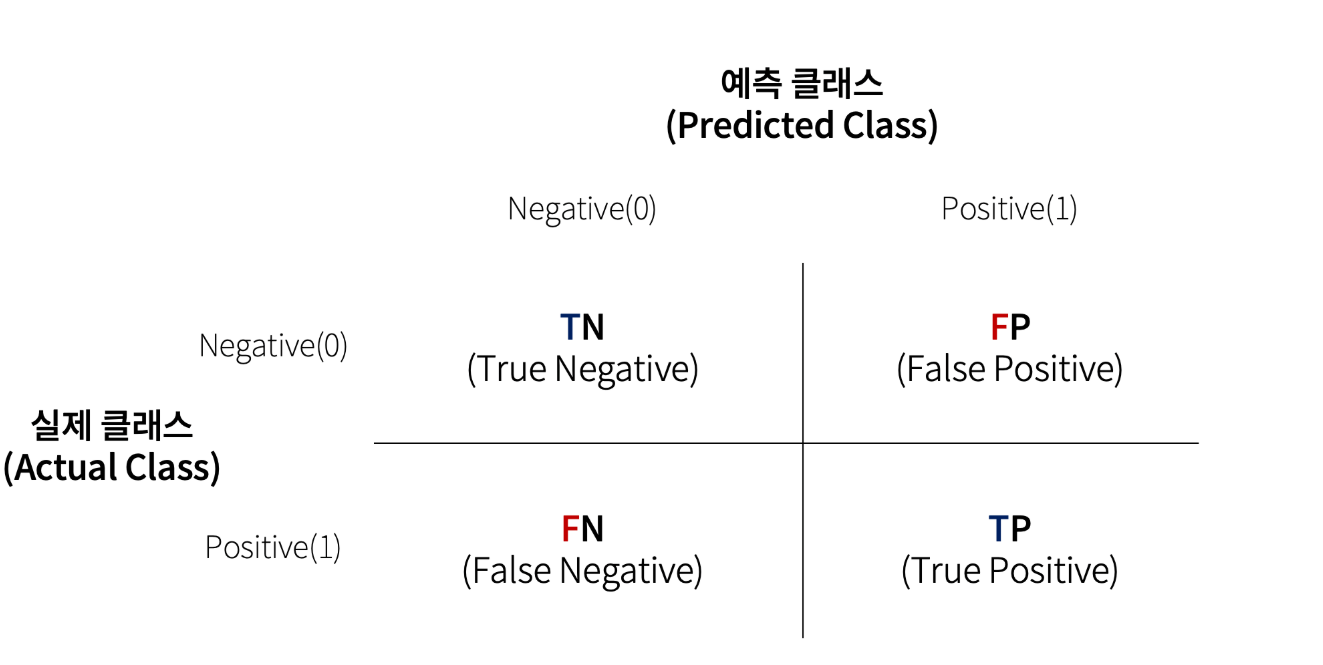



In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)


array([[405,   0],
       [ 45,   0]], dtype=int64)

오차행렬을 통해서, 정확도/정밀도/재현율 값을 알 수 있음 

정확도=예측 결과와 실제 값이 동일한 건수/전체 데이터 수=(TN+TP)/(TN+FP+FN+TP)

* 정확도의 한계를 극복하기 위해서 정밀도(Precision)과 재현율(Recall)값을 알 수 있음 


03 정밀도와 재현율

정밀도=TP/(FP+TP)
재현율=TP/(FN+TP)

* 정밀도는 예측을 positive로 한 대상 중에서 예측과 실제 값이 positive한 일치한 데이터의 비율 

ex) 스팸 메일 여부를 판단하는 모델: 스팸 메일을 알반메일로 분류하는 것은 상관없지만, 일반 메일을 스팸 메일로 분류하면 큰 문제가 생김 



* 재현율은 실제 값이 positive인 대상 중에서 예측과 실제 값이 positive로 일치한 데이터의 비율 

ex) 암 판단 모델에서 중요함: 실제로 양성인 환자를 음성으로 판단하면 안됨
=민감도 나 TPR이라고 불림 


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


#여러 평가 지표들을 한번에 묶는 함수를 불러 옴
def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))
    
    
#이제 타이타닉 생존자를 예측하고 평가를 수행하기(적용)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터를 재로딩, 데이터가공, 학습 데이터/테스트 데이터 분할

titanic_df=pd.read_csv('titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)

X_titanic_df=transform_features(X_titanic_df)
#여기에서 계속 오류가 나요ㅠㅠㅠ

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

Ir_clf=LogisticRegression()

Ir_clf.fit(X_train, y_train)
pred=Ir_clf.predict(X_test)
get_clf_eval(y_test, pred)


NameError: name 'transform_features' is not defined

In [ ]:
#p155쪽 참고 

-->이 결과값으로 오차행렬과 정확도 정밀값 재현율 나옴 
* 정밀도 갚은 높지만 재현율 갚은 낮게 나옴


<정밀도/재현율 트레이드 오프>
* 그래서 임계값 조절을 통해서 오차행렬을 변화시키고 그 결과 정밀도와 재현율을 조정할 수 있다
* 사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba() 
-->하나의 레이블 값으로 나오는 것이 아니라, 그 레이블이 나오게 된 이전 과정을 보는 것이라고 생각하면 됨

In [ ]:
pred_proba=Ir_clf.predict_proba(X_test)
pred=Ir_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출:', pred_proba[:3])

#예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result=np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두 개의 class중에서 더 큰 확률을 클래스 값으로 예측:', pred_proba_result[:3])


* 첫번째 칼럼이 0에 대한 확률/ 두번째 칼럼이 1에 대한 확률 
#p156 참고

* threshold 값보다 크면 1을, 작으면 0을 출력하는 Binarizer클래스 를 통해서 pred_proba의 예측 확률로 부터 predict_proba의 최종 클래스 값을 도출하는 것 

In [ ]:
#threshold값을 0.4에서 0.6까지 0.05씩 증가시키면서 평가 지표를 조사하는 예제

thresholds={0.4, 0.45, 0.50, 0.55, 0.60}

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds lists 객체 내의 값을 차례대로 literation하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

* 임계값별 비교를 했을 때, 결과적으로 0.45가 가장 적합했음 

* 사이킷런에서는 precision_recall_curve() API제공함 


In [ ]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1=Ir_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds=precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape:', thresholds,shape)

#반환된 임곗값 배열 로우가 147건 이므로 샘플로 10건만 추출하되, 임곗값을 15 steop으로 추출
thr_index=np.array(0, thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개', thr_index)
priny('샘플용 10개의 임계값:', np.rount(thresholds[thr_index],2))

#15step 단위로 추출된 임계값에 따른 정밀도 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))


* 임곗값이 증가할수록 정밀도도 동시에 높아지나, 재현율 값은 낮아짐(trade-off관계임)
QQQ

* 책에 이를 시각화하는 법도 나와있으니 참고 



04 F1 스코어

: 정밀도와 재현율 어느 한쪽으로도 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐

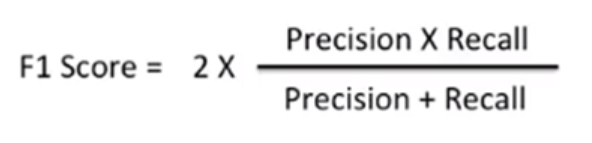


* 사이킷런에서는 F1스코어를 구하기 위해서 f1_score() 라는 API제공


In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred)
print('F1 스코어:{0:,4f}'.format(f1))

05 ROC곡선과 AUC


* ROC:

FPR이 변할 때 TPR가 어떻게 변하는지 나타내는 곡선
FPR을 x축으로, TPR을 y축으로 잡으면 변화가 곡선의 형태로 나타남 



-TPR(=재현율=민감도): 실제 양성(P)값을 정확히 예측되어야 하는 수준을 나타냄(질병이 있는 사람은 질병이 있는 것으로 양성 판정)

TPR=TP/FN+TP


-TNR(=특이성): 실제값 음성(N)가 정확히 예측되어야 하는 수준을 나타냄(질병이 없는 건강한 사람을 질병이 없는 것으로 음성 판정)

TNP=TN/FP+TN


-FPR=FP/FP+TN=1-TNR=1-특이성 

* FPR: 아닌 것 중에서 맞다고 한 확률 
* TPR: 맞는 것 중에서 맞다고 한 확률 



* ROC곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구함 


-FPR을 0으로 만들기 위해서는 threshold값을 1로 지정하면 됨-->positive 예측 기준이 높아지면서 아예 positive로 예측하지 않게 되어서 FPR이 0이 됨 

-FPR을 1으로 만들기 위해서는 threshold값을 0로 지정하면 됨-->positive 예측 기준이 낮아지면서 모두 positive로 예측하게 되어서 FPR값이 1이 됨 




* 사이킷런은 ROC곡선을 구하기 위해서 roc_curve() API제공함 

In [ ]:
from sklearn.metrics import roc_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1=Ir_clf.predict_proba(X_test)[:,1]


fprs, tprs, thresholds=roc_curve(y_test, pred_proba_class1)

#반환된 임곗값 배열 로우가 147건 이므로 샘플로 10건만 추출하되, 임곗값을 5 steop으로 추출
thr_index=np.array(0, thresholds.shape[0],5)
print('샘플 추출을 위한 임계값 배열의 index 10개', thr_index)
priny('샘플용 10개의 임계값:', np.rount(thresholds[thr_index],2))

#5step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임계값별 TPR:', np.round(tprs[thr_index],3))


* threshold가 점점 작아지면서 FPR이 조금씩 커지고, 그에 따라  TPR은 가파르게 커짐 

* AUC(Area Under Curve) 

: ROC 곡선 면적에 기반한 AUC값으로 결정 

-일반적으로 1에 가까울 수록 좋은 수치임 
-FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건임 
-곡선이 상단 모서리쪽으로 가파르게 이동할 수록 좋은 성능의 수치를 얻게 됨
-일반적으로 0.5보다 큰 값을 가짐 


In [ ]:
from sklearn.metrics import roc_auc_score

pred=Ir.clf.predict(X_test)
roc_score=roc_auc_score(y_test, pred)
print('ROC AUC 값:{0:,4f}'.format(roc_score))